In [1]:
import numpy as np

from gb import simulate
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

plt.ion()

In [9]:
Alpha = np.zeros(shape=(3, 3), dtype='d')
Alpha[0, 0] = 0.5
Alpha[0, 1] = 0.5
Alpha[1, 0] = 0.5
Alpha[1, 1] = 0.5
Alpha[2, 2] = 1
print(Alpha)
Beta = np.ones(shape=Alpha.shape)
mus = np.ones(len(Alpha)) * 0.001

[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  1. ]]


In [26]:
sim = simulate.GrangeBuscaSimulator(mus, Alpha, Beta, thinning=False)
ticks = sim.simulate(30000)

In [27]:
counting = [np.arange(len(ticks[i])) for i in range(len(ticks))]

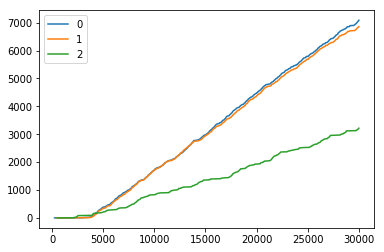

In [28]:
for i in range(len(ticks)):
    plt.plot(ticks[i], counting[i], label='%d' % i)
plt.legend()

Text(0,0.5,'$P[X > x]$')

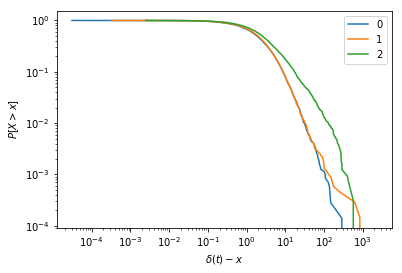

In [29]:
for i in range(len(ticks)):
    vals = np.ediff1d(ticks[i])
    ecdf = ECDF(vals)
    x_ticks = np.unique(vals)
    plt.loglog(x_ticks, (1-ecdf(x_ticks)), label='%d' % i)
plt.legend()
plt.xlabel(r'$\delta(t) - x$')
plt.ylabel(r'$P[X > x]$')

In [30]:
from scipy import stats as ss

7088


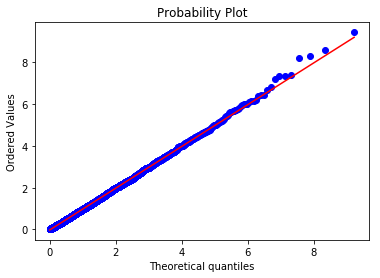

KstestResult(statistic=0.02024641453672793, pvalue=0.00598894197900476)
6860


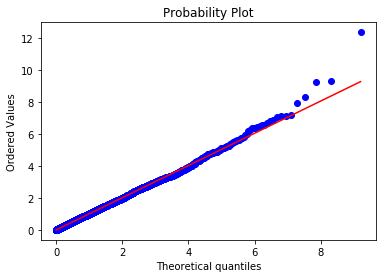

KstestResult(statistic=0.0067103682016595445, pvalue=0.9168868483921155)
3217


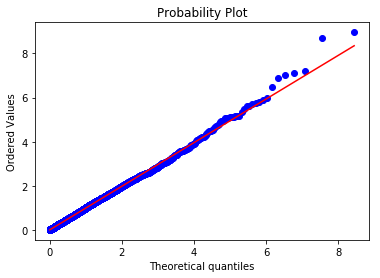

KstestResult(statistic=0.011890404407764982, pvalue=0.7533076613451619)


In [31]:
for i in range(len(sim.integrals)):
    print(len(sim.integrals[i]))
    ss.probplot(sim.integrals[i], dist=ss.expon, plot=plt)
    plt.show()
    plt.close()
    print(ss.kstest(sim.integrals[i], 'expon'))

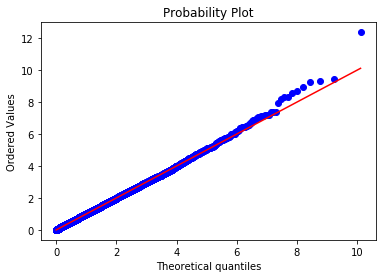

KstestResult(statistic=0.008562707061932129, pvalue=0.1613059537612654)


In [32]:
all_ints = []
for i in range(len(sim.integrals)):
    all_ints.extend(sim.integrals[i])
    
ss.probplot(all_ints, dist=ss.expon, plot=plt)
plt.show()
plt.close()
print(ss.kstest(all_ints, 'expon'))

# Com Thinning

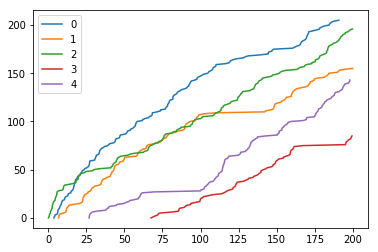

In [19]:
sim = simulate.GrangeBuscaSimulator(mus, Alpha, Beta, thinning=True)
ticks = sim.simulate(200)
counting = [np.arange(len(ticks[i])) for i in range(len(ticks))]
for i in range(len(ticks)):
    plt.plot(ticks[i], counting[i], label='%d' % i)
plt.legend()

Text(0,0.5,'$P[X > x]$')

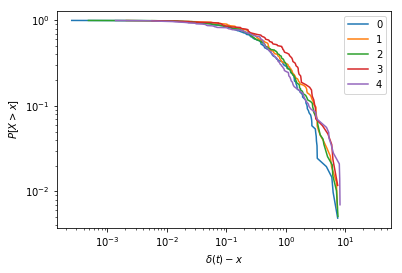

In [20]:
for i in range(len(ticks)):
    vals = np.ediff1d(ticks[i])
    ecdf = ECDF(vals)
    x_ticks = np.unique(vals)
    plt.loglog(x_ticks, (1-ecdf(x_ticks)), label='%d' % i)
plt.legend()
plt.xlabel(r'$\delta(t) - x$')
plt.ylabel(r'$P[X > x]$')

204


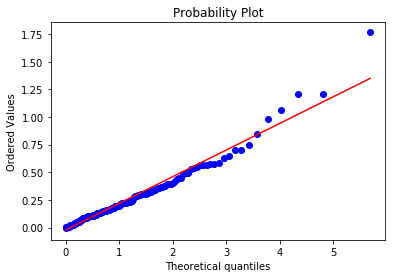

KstestResult(statistic=0.5350822834732234, pvalue=0.0)
154


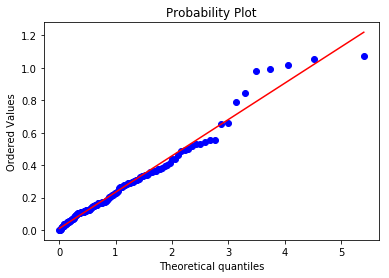

KstestResult(statistic=0.5266259258497632, pvalue=0.0)
195


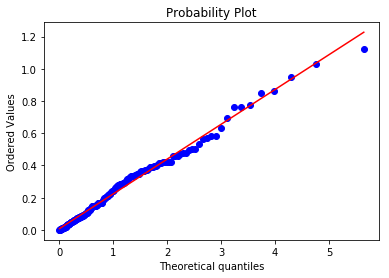

KstestResult(statistic=0.53161806764801467, pvalue=0.0)
84


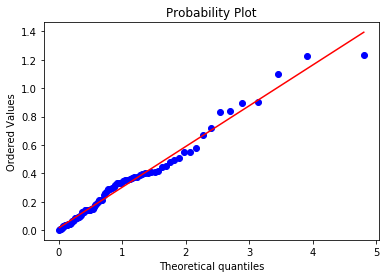

KstestResult(statistic=0.46013046344704234, pvalue=0.0)
142


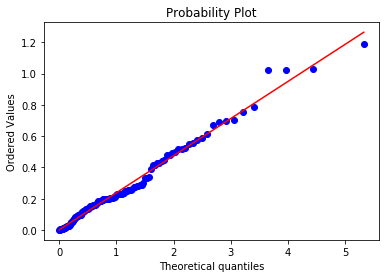

KstestResult(statistic=0.51669354411792989, pvalue=0.0)


In [21]:
for i in range(len(sim.integrals)):
    print(len(sim.integrals[i]))
    ss.probplot(sim.integrals[i], dist=ss.expon, plot=plt)
    plt.show()
    plt.close()
    print(ss.kstest(sim.integrals[i], 'expon'))

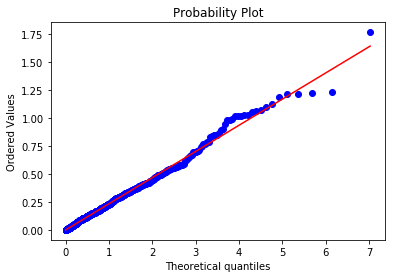

KstestResult(statistic=0.5083535273103037, pvalue=0.0)


In [22]:
all_ints = []
for i in range(len(sim.integrals)):
    all_ints.extend(sim.integrals[i])
    
ss.probplot(all_ints, dist=ss.expon, plot=plt)
plt.show()
plt.close()
print(ss.kstest(all_ints, 'expon'))